## Image Smoothing using KNN (K-Nearest Neighbours) Algorithm

In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [2]:
# Defining supporting function for KNN (this will be called in knn())
    # KNN smoothing uses k nearest neighbours then computes average and assigns it's value to center pixel

# get_knn_average takes 3 arguments (function is called inside convolution2d function)
# 1. local_matrix -> is local part of image under consideration (knn and averaging will be done on this)
# 2. n
# 3. k

def get_knn_average(local_matrix, n, k):
    # All the below mentioned commands are combined for optimization (reduce computational time)

    # Converting local matrix (n x n matrix under consideration)
    # local_matrix = np.array(local_matrix)

    center_pixel_index = int(n/2 - 0.5)
    center_pixel = local_matrix[center_pixel_index, center_pixel_index]

    # Flattening it to convert it to 1 dimension
    local_matrix = local_matrix.flatten()
    # Subtracting center pixel value from local matrix
    # diff_matrix = local_matrix - center_pixel
    # Taking absolute value (as this will be required to find nearest pixels)
    # diff_matrix = abs(diff_matrix)

    diff_matrix = abs(local_matrix - center_pixel)

    # Sorting local_matrix (which has actual pixel values) according to absolute difference between pixels
    local_matrix = local_matrix[diff_matrix.argsort()]

    # Taking average of k+1 elements (first element will be center pixel always)
    # int will round off average to nearest integer
    return (np.average(local_matrix[0 : k+1 : 1]))/255


In [3]:
# Convolution function will perform convolution over original image
# new_image pixels will be knn averaged pixel values

# convolution3d takes 3 arguments
# 1. image -> image frame (numpy array)
# 2. n
# 3. k

def convolution3d(image, n, k):
    y, x, z = image.shape
    y = y - n + 1
    x = x - n + 1
    new_image = np.zeros((y,x,z))
    for a in range(z):
        for i in range(y):
            for j in range(x):
                new_image[i][j][a] = get_knn_average(image[i:i+n, j:j+n, a], n, k)

    return new_image

In [4]:
# knn() function takes 5 arguments (4 of them are optional)

# 1. image_path (string) - This should contain path to the image with it's extension
    # e.g. image_path = 'original_images/image1.jpg'
    # All types of images (jpg, png, etc) are supported as long as they can be read as matrices (multi dimensional)
# 2. k (int or float representation of integer) - This is the number of neighbours to consider while performing smoothing
    # k can vary from 0 to (n^2 - 1) - where n is square matrix side taken under consideration
    # k = 0 implies that only center pixel will be considered (no smoothing)
# 3. n (int or float representation of integer) - This is matrix size used to implement KNN smoothing
    # n can be as large as min(length, breadth) of image
    # n should be odd as center pixel needs to be located for finding KNN w.r.t center pixel
# 4. print_logs (bool True or False) (default -> True)
    # If print_logs == True then logs for the code will be printed. It will contain image name, size, time to compute, etc
    # If print_logs == False then no logs will be printed
# 5. save_image (bool True or False) (default -> True)
    # If True image will be saved in 'knn_processed_image' folder (if folder is not present it will be created)
    # If False computed image will not be saved
    # Saved image name will contain information regarding n and k used
    # Image saved will be .jpg format (this can be changed by changing extension in knn() function)
# 6. return_image_frame (bool True or False) (default -> False)
    # If True knn() will return image frame (3D matrix)
    # If False function will not return anything (None)

def knn(image_path, k=5, n=3, print_logs=True, save_image=True, return_image_frame=False):

    # Can be used to keep track of computation time
    start_time = time.monotonic()

    # Image Name will be useful while saving it
        # Taking last index as image name will after last '/'
    image_name_with_extension = image_path.split('/')[-1]
    image_name = image_name_with_extension.split('.')[0]

    # Assertions for image_path
    # Assertion to check validity of provided image path
    assert os.path.isfile(image_path) == True, 'Image path invalid'

    # Assertions for n
    # Theoretically n should be less than image min(image length, image width)
        # But for all practical purposes n is restricted to less than 35 (<= 35) (changes this will not affect code)
    # n should be integer
    assert type(n) == int or float, 'n should be integer'
    assert n == int(n), 'n should be integer'
    # Converting n to integer (e.g. 3.0 to 3)
    n = int(n)
    # n should be odd (as nxn matrix should have a center pixel)
    assert n%2 == 1, 'n should be odd. e.g. 3, 5, 7, ...'
    # n should obviously be greater than 0
    assert n >= 1, 'n should be greater than 0'

    # Assertions for print_logs
    assert print_logs == True or print_logs == False, 'print_logs should be either True or False'

    # Assertion for save_image
    assert save_image == True or save_image == False, 'save_image should be either True or False'

    # Assertions for k
    # k provided should be integer (int) or float representation of integer
        # e.g. k can be 3 or 3.0 (2.6 will not be valid)
        # In case k = 3.0 (float) it is converted to integer
    assert type(k) == int or float, 'k should be integer'
    assert k == int(k), 'k should be integer'
    # 1 <= k <= (n^2 - 1)
    assert 0 <= k <= n**2 - 1, 'k should lie between 1 and (n^2 - 1)'
    # Converting k to integer
    k = int(k)

    # Reading the input image corresponding to path as numpy array
    try:
        image_frame = plt.imread(image_path)
    except:
        print('Error encountered while loading image\n', 'Image format might not be compatible or data corrupted')
        return

    # n should be less than min(length, width) of image for convolution to be successful
    assert n <= min(image_frame.shape[0], image_frame.shape[1]), 'Large value of n encountered than expected'

    # Printing logs
    if print_logs:
        print('Image Name is - {}'.format(image_name))
        print('Image imported successfully !\n')

        print('n = {}'.format(n))
        print('k = {}\n'.format(k))

        print('Input image size is {} x {}'.format(image_frame.shape[1], image_frame.shape[0]))
        print('Output image size will be {} x {}\n'.format(image_frame.shape[1] - (n-1), image_frame.shape[0] - (n-1)))

        print('Computing... \n')

    # Making directory to save image (if directory already exists, then image will be stored in this dir)
    try:
        os.mkdir('knn_processed_images')
    except FileExistsError:
        pass

    # KNN computation using convolution3d() and get_knn_average() starts here
    new_image = convolution3d(image_frame, n, k)

    # Can be used to keep track of computation time
    end_time = time.monotonic()

    if print_logs:
        # round() is used to round off time to given decimal places
        print('Time Taken to compute is - {} secs\n'.format(round(end_time - start_time, 4)))

        plt.figure(0)
        plt.title('Original Image')
        plt.imshow(image_frame)

        plt.figure(1)
        plt.title('Image after KNN Smoothing')
        plt.imshow(new_image)

    if save_image:
        plt.imsave('knn_processed_images/{}_knn_n_{}_k_{}.jpg'.format(image_name, n, k), new_image)
        if print_logs:
            print('Image saved at - knn_processed_images/{}_knn_n_{}_k_{}.jpg'.format(image_name, n, k))

    if return_image_frame:
        return new_image
    else:
        return

Image Name is - image1
Image imported successfully !

n = 3
k = 2

Input image size is 640 x 388
Output image size will be 638 x 386

Computing... 

Time Taken to compute is - 29.141 secs

Image saved at - knn_processed_images/image1_knn_n_3_k_2.jpg


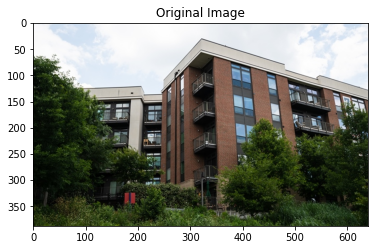

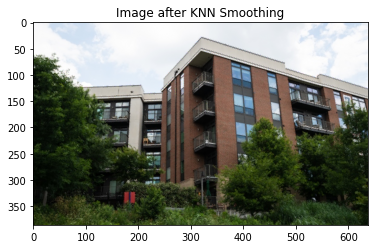

In [5]:
knn('knn_original_images/image1.jpg', n=3, k=2, print_logs=True, save_image=True, return_image_frame=False)

Image Name is - image2
Image imported successfully !

n = 3
k = 4

Input image size is 640 x 360
Output image size will be 638 x 358

Computing... 

Time Taken to compute is - 25.156 secs

Image saved at - knn_processed_images/image2_knn_n_3_k_4.jpg


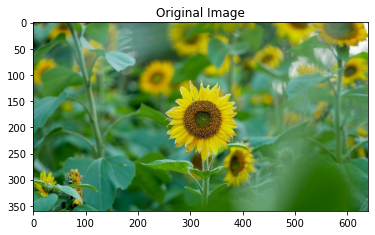

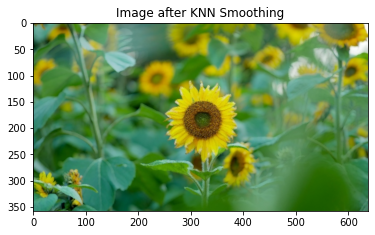

In [6]:
knn('knn_original_images/image2.jpg', n=3, k=4, print_logs=True, save_image=True, return_image_frame=False)

Image Name is - image3
Image imported successfully !

n = 3
k = 6

Input image size is 640 x 360
Output image size will be 638 x 358

Computing... 

Time Taken to compute is - 22.828 secs

Image saved at - knn_processed_images/image3_knn_n_3_k_6.jpg


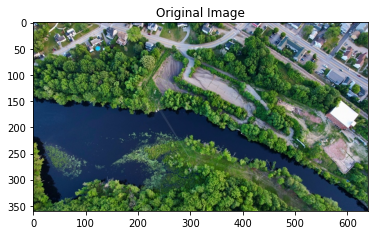

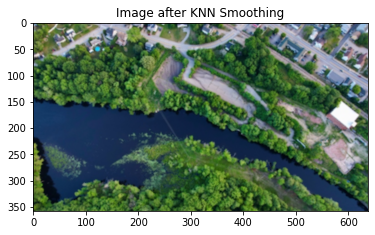

In [7]:
knn('knn_original_images/image3.jpg', n=3, k=6, print_logs=True, save_image=True, return_image_frame=False)

Image Name is - image4
Image imported successfully !

n = 5
k = 20

Input image size is 47 x 44
Output image size will be 43 x 40

Computing... 

Time Taken to compute is - 0.266 secs

Image saved at - knn_processed_images/image4_knn_n_5_k_20.jpg


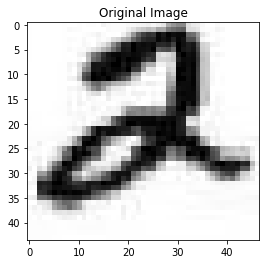

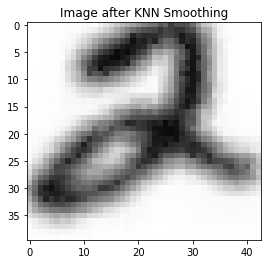

In [8]:
knn('knn_original_images/image4.jpg', n=5, k=20, print_logs=True, save_image=True, return_image_frame=False)